In [1]:

import snscrape.modules.twitter as sntwitter
import pandas as pd

# Define your search query for Pakistani brands
query = 'Khaadi OR "Gul Ahmed" OR Sapphire since:2024-01-01 until:2024-02-01 lang:en'
tweets = []

try:
    # Attempt to collect up to 100 tweets
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
        if i > 100:
            break
        tweets.append([tweet.content, tweet.date, tweet.user.username])

    df = pd.DataFrame(tweets, columns=['Tweet', 'Date', 'Username'])
    df.to_csv('brand_tweets.csv', index=False)
    print("Scraping completed successfully.")

AttributeError: 'FileFinder' object has no attribute 'find_module'

In [8]:
import pandas as pd

df = pd.read_csv('brand_reviews.csv')
df.head()


,comments,brand_name
0,Not yet tried but as listened they have good q...,AlkaramStudios
1,Cooperative Staff,AlkaramStudios
2,Nice one location and available parking staff ...,AlkaramStudios
3,Nice Place for shopping.,AlkaramStudios
4,Nice branch of Al Karam,AlkaramStudios


In [9]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r"@\w+|#\w+", '', text)  # remove mentions and hashtags
    text = re.sub(r"[^\w\s]", '', text)  # remove punctuation
    text = re.sub(r"\d+", '', text)  # remove digits
    text = re.sub(r"\s+", ' ', text).strip()  # remove extra whitespace
    return text

df_cleaned = df_raw.copy()
df_cleaned['cleaned_comment'] = df_cleaned['comments'].apply(clean_text)

# Save cleaned dataset to new CSV file
df_cleaned.to_csv('cleaned_brand_reviews.csv', index=False)
print("Cleaned data saved as 'cleaned_brand_reviews.csv'")


Cleaned data saved as 'cleaned_brand_reviews.csv'


In [10]:
from textblob import TextBlob

df_clean = pd.read_csv('cleaned_brand_reviews.csv')

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_clean['sentiment'] = df_clean['cleaned_comment'].apply(get_sentiment)

# Save final data with sentiment
df_clean.to_csv('brand_reviews_with_sentiment.csv', index=False)
print("Sentiment-added data saved as 'brand_reviews_with_sentiment.csv'")


Sentiment-added data saved as 'brand_reviews_with_sentiment.csv'


C:\Users\ABC\AppData\Local\Temp\ipykernel_5276\532031560.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


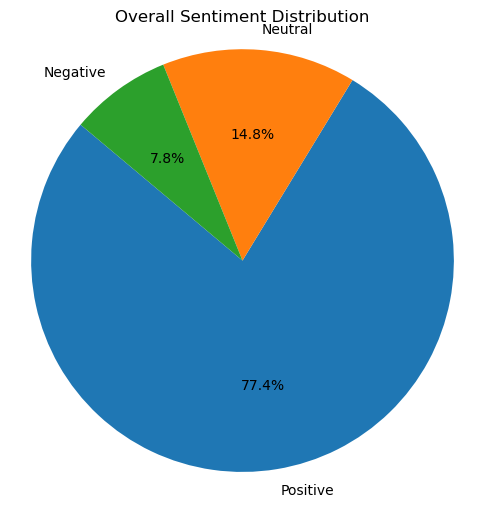

C:\Users\ABC\AppData\Local\Temp\ipykernel_5276\532031560.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=sentiment_counts.index, palette='pastel')


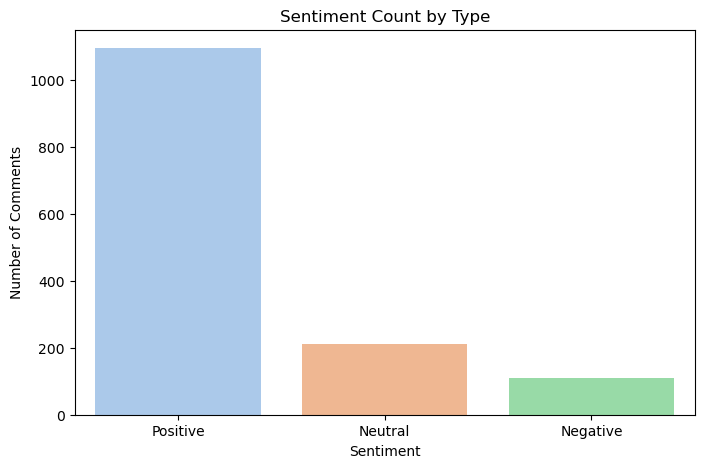

<Figure size 1000x600 with 0 Axes>

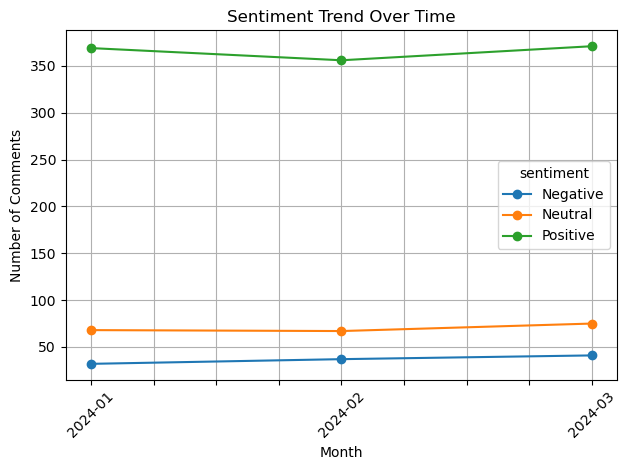

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv("brand_reviews_with_sentiment.csv")

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# ---------- 1. Sentiment Distribution Pie Chart ----------
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall Sentiment Distribution')
plt.axis('equal')
plt.show()

# ---------- 2. Sentiment Count Bar Graph ----------
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', order=sentiment_counts.index, palette='pastel')
plt.title('Sentiment Count by Type')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

# ---------- 3. Sentiment Over Time (Line Graph) ----------
# Group by week/month
df['month'] = df['date'].dt.to_period('M').astype(str)
sentiment_over_time = df.groupby(['month', 'sentiment']).size().unstack().fillna(0)

# Line plot
plt.figure(figsize=(10,6))
sentiment_over_time.plot(kind='line', marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


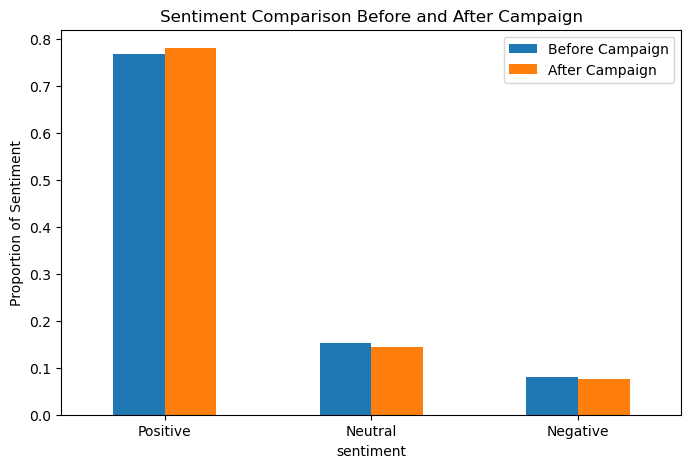

In [16]:
# Define date for campaign
campaign_date = pd.to_datetime('2024-02-15')

# Compare sentiment before and after
before = df[df['date'] < campaign_date]['sentiment'].value_counts(normalize=True)
after = df[df['date'] >= campaign_date]['sentiment'].value_counts(normalize=True)

comparison_df = pd.DataFrame({'Before Campaign': before, 'After Campaign': after}).fillna(0)

# Bar plot comparison
comparison_df.plot(kind='bar', figsize=(8,5))
plt.title('Sentiment Comparison Before and After Campaign')
plt.ylabel('Proportion of Sentiment')
plt.xticks(rotation=0)
plt.show()
